In [455]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [533]:
import numpy as np
import pylamp.utils.functions as fn
import matplotlib.pyplot as plt
from pylamp.loss.losses import CrossEntropyLoss
from pylamp.neural.sequential import Sequential
from pylamp.neural.layers import Linear, Conv1D, MaxPool1D, Flatten
from pylamp.optim.optimizer import Optim
from pylamp.neural.activations import ReLU,Softmax
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import cv2
from sklearn.metrics import accuracy_score
from pylamp.optim.optimizer import SGD
from pylamp.utils.usps import load_usps
from pylamp.utils.plotter import Display
import pandas as pd

In [534]:
X_train = pd.read_csv("./data/ArabicChars/csvTrainImages.csv").values
X_test = pd.read_csv("./data/ArabicChars/csvTestImages.csv").values

In [535]:
X_train.shape, X_test.shape

((13439, 1024), (3359, 1024))

In [536]:
X_train = X_train.reshape(len(X_train),32, 32)
X_test = X_test.reshape(len(X_test),32, 32)

In [537]:
X_train.shape, X_test.shape

((13439, 32, 32), (3359, 32, 32))

In [538]:
# Initialize an empty array to store resized images
resized_array = np.empty((len(X_train), 16, 16))

# Resize each image in the array from 32x32 to 16x16
for i in range(len(X_train)):
    resized_array[i] = cv2.resize(np.uint8(X_train[i]), (16, 16))

X_train = resized_array
resized_array = np.empty((len(X_test), 16, 16))

# Resize each image in the array from 32x32 to 16x16
for i in range(len(X_test)):
    resized_array[i] = cv2.resize(np.uint8(X_test[i]), (16, 16))

X_test = resized_array

In [539]:
X_train.shape, X_test.shape

((13439, 16, 16), (3359, 16, 16))

In [540]:
X_train = X_train.reshape((len(X_train),-1)) 
X_test = X_test.reshape((len(X_test),-1)) 

In [541]:
X_train.shape, X_test.shape

((13439, 256), (3359, 256))

In [542]:
# features scaling
# scaler = MinMaxScaler() 


scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [543]:
y_train = pd.read_csv("./data/ArabicChars/csvTrainLabel.csv")
y_test = pd.read_csv("./data/ArabicChars/csvTestLabel.csv")

In [544]:
y_test = y_test["1"].astype(str).str.zfill(2)
y_test = pd.get_dummies(y_test, prefix='').astype(int).values

y_train = y_train["1"].astype(str).str.zfill(2)
y_train = pd.get_dummies(y_train, prefix='').astype(int).values

In [545]:
arabic_alphabet = {
    1: 'ا',  # Alif
    2: 'ب',  # Ba
    3: 'ت',  # Ta
    4: 'ث',  # Tha
    5: 'ج',  # Jeem
    6: 'ح',  # Haa
    7: 'خ',  # Khaa
    8: 'د',  # Dal
    9: 'ذ',  # Dhal
    10: 'ر',  # Ra
    11: 'ز',  # Zay
    12: 'س',  # Seen
    13: 'ش',  # Sheen
    14: 'ص',  # Saad
    15: 'ض',  # Daad
    16: 'ط',  # Taa
    17: 'ظ',  # Zaa
    18: 'ع',  # Ain
    19: 'غ',  # Ghain
    20: 'ف',  # Fa
    21: 'ق',  # Qaf
    22: 'ك',  # Kaf
    23: 'ل',  # Lam
    24: 'م',  # Meem
    25: 'ن',  # Noon
    26: 'ه',  # Ha
    27: 'و',  # Waw
    28: 'ي'   # Ya
}

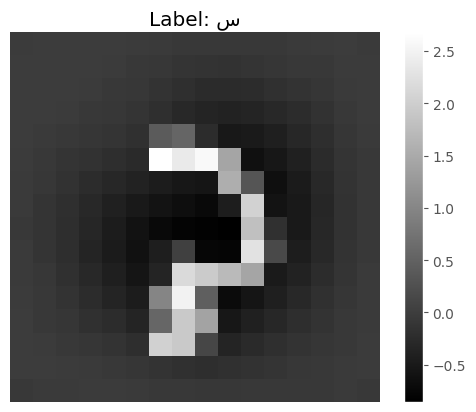

In [546]:
index = np.random.randint(len(X_train))
image = X_train[index]
label = arabic_alphabet[np.argmax(y_train[index])+1]

Display().plot_arabic(image, label)

# model linear

In [519]:


input_size = X_train.shape[1]
output_size = y_train.shape[1]

# Create a sequential model
model = Sequential()

# Add modules to the sequential model
model.add_module(Linear(input_size=input_size, output_size=output_size)) 
model.add_module(Softmax())

loss_func = CrossEntropyLoss()
optimizer = Optim(model,loss_func,1e-2)
batch_size = 128
epochs = 100
losses = SGD(optimizer,X_train, y_train, batch_size,epochs,verbose=True)

Epoch 1/100, Average Loss: 3.3299527776389786
Epoch 11/100, Average Loss: 3.255424011069059
Epoch 21/100, Average Loss: 3.2413153161437767
Epoch 31/100, Average Loss: 3.236041224033975
Epoch 41/100, Average Loss: 3.2332522880717587
Epoch 51/100, Average Loss: 3.2308249037519303
Epoch 61/100, Average Loss: 3.229352522046102
Epoch 71/100, Average Loss: 3.2283209894726355
Epoch 81/100, Average Loss: 3.2280011302526286
Epoch 91/100, Average Loss: 3.226298761595927
Training finished.


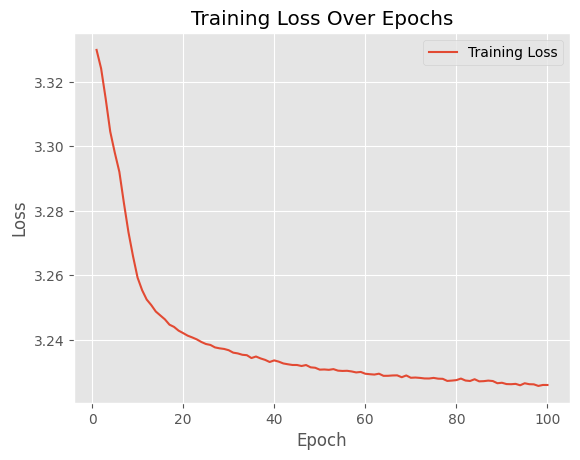

In [520]:
Display().plot_loss(losses)

In [521]:
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.forward(X_test),axis=1)

In [522]:
np.unique(y_pred)

array([ 0, 14, 18, 19, 23, 25], dtype=int64)

In [523]:
print("Accuracy:", accuracy_score(y_true, y_pred))

Accuracy: 0.15599880916939565


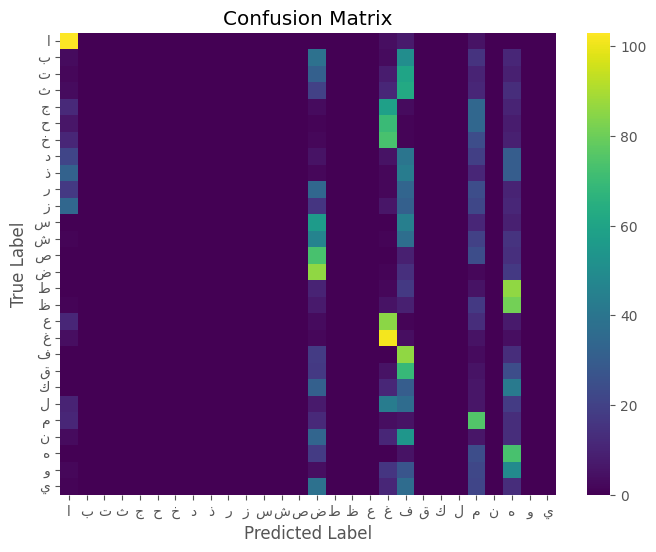

In [524]:
Display().confusion_matrix(y_true, y_pred, arabic_alphabet.values())

# Model Convolution

net = Sequential(
    Conv1D(3, 1, 32, 1),
    ReLU(),
    MaxPool1D(2, 2),
    Conv1D(3, 32, 32),
    ReLU(),
    MaxPool1D(2, 2),
    Flatten(),
    Linear(1984, 10),
)

In [552]:

input_size = 256
output_size = 28  # Number of classes for classification

model = Sequential()

# Add modules to the sequential model
model.add_module(Conv1D(in_channels=1, out_channels=32, kernel_size=3, strides=1))
model.add_module( ReLU())
model.add_module(MaxPool1D(kernel_size=2, strides=2))
model.add_module(Conv1D(in_channels=32, out_channels=32, kernel_size=3, strides=1))
model.add_module( ReLU())
model.add_module(MaxPool1D(kernel_size=2, strides=2))
model.add_module(Flatten())
model.add_module(Linear(1984 , output_size))

loss_func = CrossEntropyLoss()
optimizer = Optim(model,loss_func,1e-2)
batch_size = 64
epochs = 10
losses = SGD(optimizer,X_train, y_train, batch_size,epochs,add_channel_x=True,verbose=True)

Epoch 1/10, Average Loss: 2.2955036569683895
Epoch 2/10, Average Loss: 1.5763129832384728
Epoch 3/10, Average Loss: 1.3058617047491314
Epoch 4/10, Average Loss: 1.1581287078305793
Epoch 5/10, Average Loss: 1.0515453516095117
Epoch 6/10, Average Loss: 0.9575945132359044
Epoch 7/10, Average Loss: 0.8939274726819478
Epoch 8/10, Average Loss: 0.835984734350663
Epoch 9/10, Average Loss: 0.7889945605726308
Epoch 10/10, Average Loss: 0.7373612649799572
Training finished.


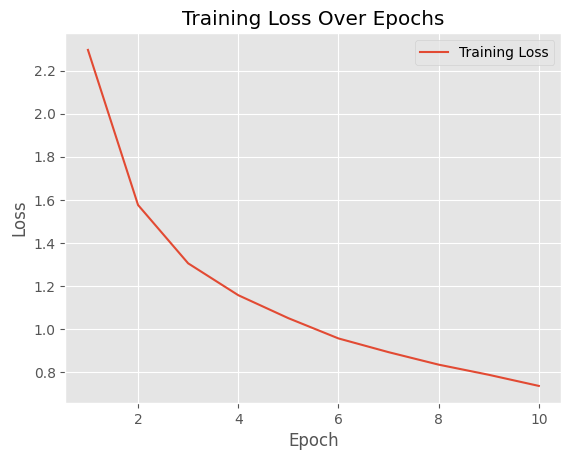

In [553]:
Display().plot_loss(losses)

In [556]:
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.forward(np.expand_dims(X_test, axis=-1)),axis=1)

In [557]:
print("Accuracy:", accuracy_score(y_true, y_pred))

Accuracy: 0.6594224471568919


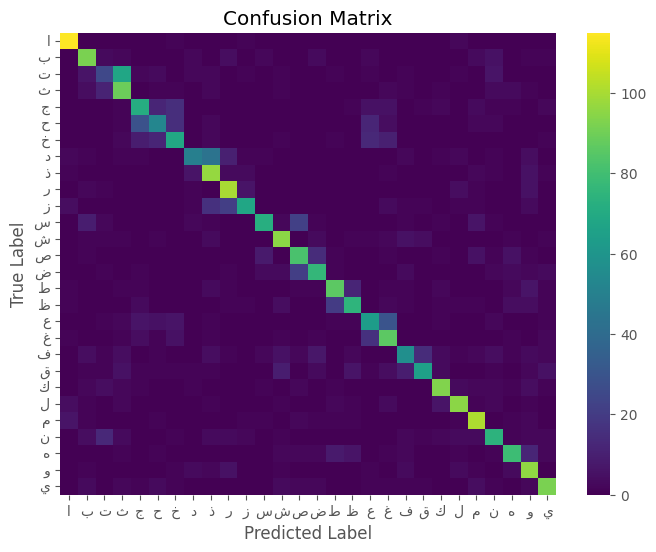

In [558]:
Display().confusion_matrix(y_true, y_pred, arabic_alphabet.values())